In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

 w: [0.08 0.54 0.03],  b: 0.0106 

In [3]:
w_init = np.array([ 0.08, 0.54, 0.03])
b_init = 0.0106

In [4]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]

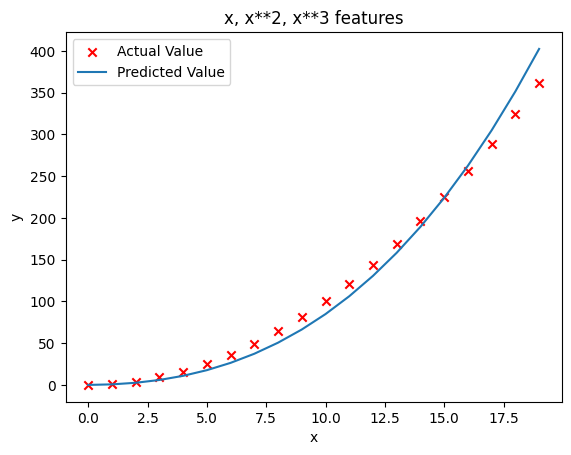

In [7]:
#Plot the graph
#Actual value
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
#Predicted value
plt.plot(x, X@w_init + b_init, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Note the value of  𝐰 is :
  [0.08 0.54 0.03] and b : is 0.0106.
  This implies the model after fitting/training :
        0.08𝑥+0.54𝑥^2+0.03𝑥^3+0.0106

An Alternate View of plotting:

In [8]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

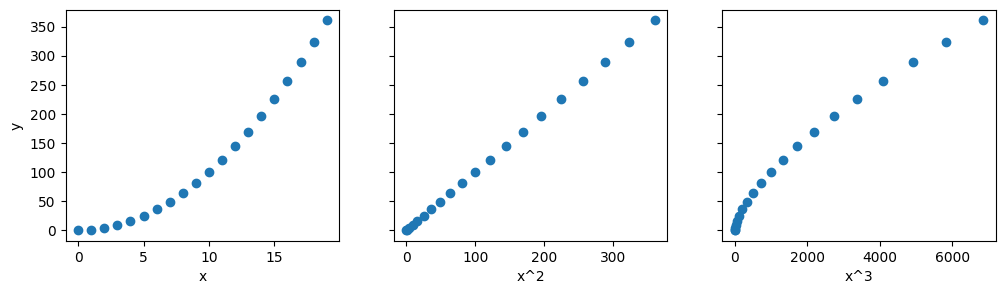

In [9]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

Scaling feature:

In [13]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # we do not need to make a loop couse np function will do the job!
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [16]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


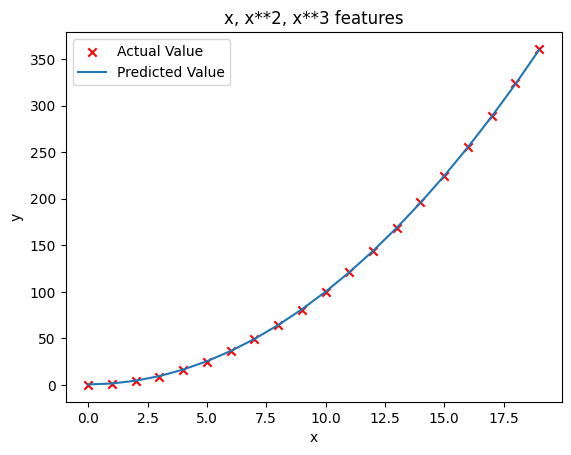

In [22]:
#Plotting with the normalized features:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

w_init = [5.27e-05, 1.13e+02, 8.43e-05]
b_init = 123.5000

#Actual value
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
#Predicted value
plt.plot(x, np.dot(X, w_init) + b_init, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend() 
plt.show()

Complex Function:

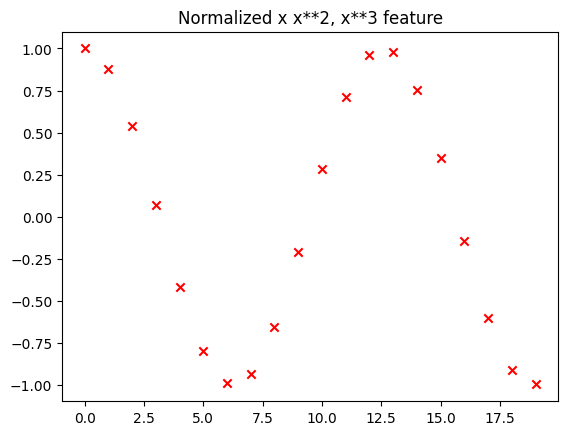

In [35]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

# w array is not acurate.
w = np.array([-1.34, -10.  ,24.78   ,5.96, -12.49 ,-16.26,  -9.51  , 0.59,   8.7 ,  11.94 , 27.9, 79.0, -82.12])
b = -0.0073

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
#plt.plot(x,X@w + b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend()
plt.show()